# Image generation (plus some gold mining)

In [1]:
import sys, os
sys.path.append('../')

import logging
import numpy as np
import matplotlib.pyplot as plt

from units import *
from simulation import SubhaloSimulator

logging.basicConfig(format='%(message)s', level=logging.INFO)

## Parameters

In [2]:
alpha_mean = 2e8/M_s
alpha_std = 0.2e8/M_s

beta_mean = -1.9
beta_std = 0.05

n_sims = 9

In [3]:
alpha = np.random.normal(loc=alpha_mean, scale=alpha_std, size=n_sims)
beta = np.random.normal(loc=beta_mean, scale=beta_std, size=n_sims)

assert np.min(alpha) > 0.
assert np.max(beta) < -1.

In [4]:
alpha_ref = alpha_mean
beta_ref = beta_mean

## Generate data

In [5]:
sim = SubhaloSimulator()

#images = sim.rvs(alpha, beta, n_sims)
images, t_xz, log_r_xz = sim.rvs_score_ratio(alpha, beta, alpha_ref, beta_ref, n_sims)

## A first look at the data

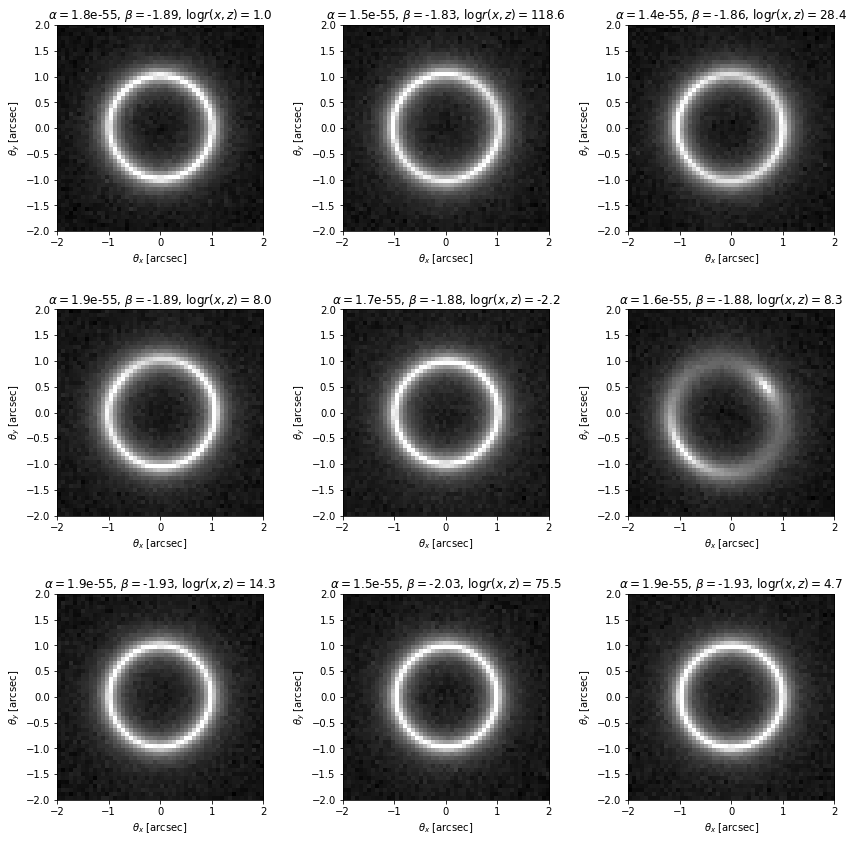

In [8]:
plt.figure(figsize=(12,12))

for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(np.log10(images[i]), vmax=3.5, cmap='gist_gray', extent=(-2.,2.,-2.,2.), origin="lower")
    plt.xlabel(r"$\theta_x$ [arcsec]")
    plt.ylabel(r"$\theta_y$ [arcsec]")
    description = r"$\alpha = ${:.1e}, $\beta = ${:.2f}, $\log r(x,z) = ${:.1f}".format(
            alpha[i],
            beta[i],
            log_r_xz[i]
        )
    plt.title(
        description,
        fontsize=12
    )
    
plt.tight_layout()
plt.show()